## Who's a Good Boy? Code Part 1 of 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

from scipy.stats import zscore

# Intial Cleaning

In [2]:
akc = pd.read_csv("AKC Breed Info.csv")
bis = pd.read_csv("best_in_show.csv")
bis =bis.drop(index =0) # First row is metadata
breed = pd.read_csv("dog_breeds.csv")
intel = pd.read_csv("dog_intelligence.csv")
dog1 = pd.read_csv("dogs_cleaned.csv")

In [3]:
display(akc)
display(bis)
display(breed)
display(intel)
display(dog1)

index                 Breed height_low_inches height_high_inches  \
0        0                 Akita                26                 28   
1        1    Anatolian Sheepdog                27                 29   
2        2  Bernese Mountain Dog                23                 27   
3        3            Bloodhound                24                 26   
4        4                Borzoi                26                 28   
..     ...                   ...               ...                ...   
145    145              Papillon                 8                 11   
146    146            Pomeranian                12                 12   
147    147            Poodle Toy                10                 10   
148    148       Toy Fox Terrier                10                 10   
149    149     Yorkshire Terrier                 8                  8   

    weight_low_lbs weight_high_lbs  
0               80             120  
1              100             150  
2               85             110  
3               80             120  
4               70             100  
..             ...             ...  
145              5              10  
146              3               7  
147             10              10  
148              4               7  
149              3               7  

[150 rows x 6 columns]

Dog breed  Unnamed: 1      category  Unnamed: 3  \
1                  Border Collie         NaN       herding         NaN   
2                 Border Terrier         NaN       terrier         NaN   
3                       Brittany         NaN      sporting         NaN   
4                  Cairn Terrier         NaN       terrier         NaN   
5         Welsh Springer Spaniel         NaN      sporting         NaN   
..                           ...         ...           ...         ...   
170                   Weimaraner         NaN      sporting         NaN   
171                Welsh Terrier         NaN       terrier         NaN   
172             Wire Fox Terrier         NaN       terrier         NaN   
173  Wirehaired Pointing Griffon         NaN      sporting         NaN   
174               Xoloitzcuintli         NaN  non-sporting         NaN   

     datadog score POPULARITY IN US POPULARITY IN US.1 LIFETIME COST, $  \
1             3.64               45                 39          $20,143   
2             3.61               80                 61          $22,638   
3             3.54               30                 30          $22,589   
4             3.53               59                 48          $21,992   
5             3.34              130                 81          $20,224   
..             ...              ...                ...              ...   
170            NaN               32                NaN          no data   
171            NaN               99                NaN          no data   
172            NaN              100                NaN          no data   
173            NaN               92                NaN          no data   
174            NaN              155                NaN          no data   

    5 LIFETIME COST  Unnamed: 9  ... Unnamed: 59  \
1               48%         NaN  ...         NaN   
2               14%         NaN  ...         NaN   
3               16%         NaN  ...         NaN   
4               22%         NaN  ...         NaN   
5               47%         NaN  ...         NaN   
..              ...         ...  ...         ...   
170             NaN         NaN  ...         NaN   
171             NaN         NaN  ...         NaN   
172             NaN         NaN  ...         NaN   
173             NaN         NaN  ...         NaN   
174             NaN         NaN  ...         NaN   

    Other regular costs, total per lifetime, $ total  per year, $  \
1                                       13,095              1,046   
2                                       14,643              1,046   
3                                       13,514              1,046   
4                                       14,476              1,046   
5                                       13,064              1,046   
..                                         ...                ...   
170                                    no data              1,046   
171                                    no data              1,046   
172                                     13,775              1,046   
173                                      9,204              1,046   
174                                    no data              1,046   

    total, per year, £ toys, presents, treats, per year, £  \
1                784.0                                 121   
2                784.0                                 121   
3                784.0                                 121   
4                784.0                                 121   
5                784.0                                 121   
..                 ...                                 ...   
170              784.0                                 121   
171              784.0                                 121   
172              784.0                                 121   
173              784.0                                 121   
174              784.0                                 121   

    pet sitters, per year, £ groom

Breed Country of Origin                     Fur Color  \
0       Labrador Retriever            Canada      Yellow, Black, Chocolate   
1          German Shepherd           Germany                    Black, Tan   
2                  Bulldog           England                    White, Red   
3                   Poodle            France  White, Black, Brown, Apricot   
4                   Beagle           England        White, Tan, Red, Lemon   
..                     ...               ...                           ...   
112  Catahoula Leopard Dog     United States                  Merle, Black   
113         Cocker Spaniel           England                  Black, Brown   
114    Miniature Shiba Inu             Japan                   Red, Sesame   
115       Belgian Tervuren           Belgium                          Fawn   
116          Pharaoh Hound             Malta                           Red   

    Height (in) Color of Eyes Longevity (yrs)  \
0         21-24         Brown           10-12   
1         22-26         Brown            7-10   
2         12-16         Brown            8-10   
3         10-15   Brown, Blue           12-15   
4         13-15         Brown           12-15   
..          ...           ...             ...   
112       20-26         Brown           12-14   
113       14-15         Brown           12-15   
114       13-16         Brown           12-15   
115       22-26         Brown           12-14   
116       21-25         Brown           12-14   

                                      Character Traits  \
0    Loyal, friendly, intelligent, energetic, good-...   
1    Loyal, intelligent, protective, confident, tra...   
2                           Loyal, calm, gentle, brave   
3    Intelligent, active, affectionate, hypoallergenic   
4           Curious, friendly, energetic, good-natured   
..                                                 ...   
112        Intelligent, energetic, good-natured, loyal   
113      Intelligent, energetic, playful, good-natured   
114      Intelligent, energetic, playful, good-natured   
115        Intelligent, energetic, good-natured, loyal   
116        Intelligent, energetic, good-natured, loyal   

                           Common Health Problems  
0          Hip dysplasia, obesity, ear infections  
1    Hip dysplasia, elbow dysplasia, pancreatitis  
2     Skin allergies, respiratory issues, obesity  
3         Hip dysplasia, epilepsy, bladder stones  
4         Ear infections, hip dysplasia, epilepsy  
..                                            ...  
112   Dental problems, eye issues, skin allergies  
113   Dental problems, eye issues, skin allergies  
114   Dental problems, eye issues, skin allergies  
115   Dental problems, eye issues, skin allergies  
116   Dental problems, eye issues, skin allergies  

[117 rows x 8 columns]

index              Breed  \
0        0      Border Collie   
1        1             Poodle   
2        2    German Shepherd   
3        3   Golden Retriever   
4        4  Doberman Pinscher   
..     ...                ...   
131    131             Borzoi   
132    132          Chow Chow   
133    133            Bulldog   
134    134            Basenji   
135    135       Afghan Hound   

                                       Classification obey  reps_lower  \
0                                      Brightest Dogs  95%           1   
1                                      Brightest Dogs  95%           1   
2                                      Brightest Dogs  95%           1   
3                                      Brightest Dogs  95%           1   
4                                      Brightest Dogs  95%           1   
..                                                ...  ...         ...   
131  Lowest Degree of Working/Obedience Intelligence   NaN          81   
132  Lowest Degree of Working/Obedience Intelligence   NaN          81   
133  Lowest Degree of Working/Obedience Intelligence   NaN          81   
134  Lowest Degree of Working/Obedience Intelligence   NaN          81   
135  Lowest Degree of Working/Obedience Intelligence   NaN          81   

     reps_upper  
0             4  
1             4  
2             4  
3             4  
4             4  
..          ...  
131         100  
132         100  
133         100  
134         100  
135         100  

[136 rows x 6 columns]

Breed Name  \
0                         Afador   
1                    Affenhuahua   
2                  Affenpinscher   
3                   Afghan Hound   
4               Airedale Terrier   
..                           ...   
386  Wirehaired Pointing Griffon   
387               Xoloitzcuintli   
388               Yakutian Laika   
389                     Yorkipoo   
390            Yorkshire Terrier   

                             Detailed Description Link    Dog Size  \
0                https://dogtime.com/dog-breeds/afador  Very Large   
1           https://dogtime.com/dog-breeds/affenhuahua       Small   
2         https://dogtime.com/dog-breeds/affenpinscher       Small   
3          https://dogtime.com/dog-breeds/afghan-hound  Very Large   
4      https://dogtime.com/dog-breeds/airedale-terrier  Very Large   
..                                                 ...         ...   
386  https://dogtime.com/dog-breeds/wirehaired-poin...  Very Large   
387       https://dogtime.com/dog-breeds/xoloitzuintli       Large   
388      https://dogtime.com/dog-breeds/yakutian-laika  Very Large   
389            https://dogtime.com/dog-breeds/yorkipoo       Small   
390   https://dogtime.com/dog-breeds/yorkshire-terrier  Very Small   

      Dog Breed Group                                       Height  \
0    Mixed Breed Dogs                              20 to 29 inches   
1    Mixed Breed Dogs                               6 to 12 inches   
2      Companion Dogs          9 to 11 inches tall at the shoulder   
3          Hound Dogs         24 to 26 inches tall at the shoulder   
4        Terrier Dogs         21 to 23 inches tall at the shoulder   
..                ...                                          ...   
386     Sporting Dogs         20 to 24 inches tall at the shoulder   
387    Companion Dogs  18 inches to 23 inches tall at the shoulder   
388      Working Dogs                              20 to 23 inches   
389       Hybrid Dogs          7 to 15 inches tall at the shoulder   
390    Companion Dogs           8 to 9 inches tall at the shoulder   

     Avg. Height, cm           Weight  Avg. Weight, kg       Life Span  \
0              62.23  50 to 75 pounds            28.12  10 to 12 years   
1              22.86   4 to 12 pounds             3.60  13 to 18 years   
2              25.40    7 to 9 pounds             3.60  12 to 14 years   
3              63.50  50 to 60 pounds            24.75  10 to 12 years   
4              55.88  40 to 65 pounds            23.62  10 to 13 years   
..               ...              ...              ...             ...   
386            55.88  50 to 60 pounds            24.75  10 to 14 years   
387            52.07  10 to 50 pounds            13.50  14 to 20 years   
388            54.61  40 to 55 pounds            21.38  10 to 12 years   
389            27.94   3 to 14 pounds             3.82  10 to 15 years   
390            21.59    4 to 6 pounds             2.25  12 to 15 years   

     Avg. Life Span, years  ...  Intelligence  Potential For Mouthiness  \
0                     11.0  ...             5                         4   
1                     16.0  ...             3                         4   
2                     13.0  ...             4                         4   
3                     11.0  ...             4                         3   
4                     12.0  ...             5                         5   
..                     ...  ...           ...                       ...   
386                   12.0  ...             5                         3   
387                   17.0  ...             5                         3   
388                   11.0  ...             4                         2   
389                   12.0  ...             4                         3   
390                   14.0  ...             3                         2   

     Prey Drive  Tendency To Bark Or Howl  Wanderlust Potential  \
0           4.0                       4.0         

The best in show dataset has the most info, so let's build upon that. We will remove NaNs, the metadata index. I will keep scores and discard ratings, except popularity rankings, and percentages. I will keep the first ultimate mega dog score. Many of the data columns at the end are redundant and captured elsewhere in the dataset so I will remove them. I'll also remove NaNs

Ratings such as  I do enjoy the height range given by akc best. I would also like to include binary varianles pertaining to charcter traits and common health problems, and will discard best in show's classification for that. Intellgence was best calculated in the dataset based of that reason



In [4]:
bis.columns

Index(['Dog breed', 'Unnamed: 1', 'category', 'Unnamed: 3', 'datadog score',
       'POPULARITY IN US', 'POPULARITY IN US.1', 'LIFETIME COST, $',
       '5 LIFETIME COST', 'Unnamed: 9',
       '1 INTELLIGENCE (TRAINABILITY) ranking',
       'INTELLIGENCE (TRAINABILITY) ranking', '2 LONGEVITY', 'LONGEVITY',
       '3 NO. OF GENETIC AILMENTS', 'GENETIC AILMENTS',
       '4a average purchase price, US$', 'average purchase price, US$',
       '4b food costs per year, US$', 'food costs per year, US$',
       '5a grooming required ', 'grooming required ',
       '5b suitability for children ', 'suitability for children ',
       'Unnamed: 24', 'ULTIMATE TOP DOG MEGA SCORE (with kids)',
       'ULTIMATE TOP DATA DOG MEGA RANKING - without kids',
       'ULTIMATE TOP DATA DOG MEGA RANKING - with kids',
       'ULTIMATE TOP DOG MEGA SCORE', 'POPULAR RATING', 'Unnamed: 30',
       'size category', 'weight (kg)', 'weight (lbs)', 'shoulder height (cm)',
       'shoulder height (in)', 'Unnamed: 36'

In [5]:
akc = akc.drop(['index'], axis = 1)

excess_bis = ['Unnamed: 1','Unnamed: 3','POPULARITY IN US.1','5 LIFETIME COST','Unnamed: 9','1 INTELLIGENCE (TRAINABILITY) ranking','INTELLIGENCE (TRAINABILITY) ranking',
             'LONGEVITY','3 NO. OF GENETIC AILMENTS','GENETIC AILMENTS','average purchase price, US$','food costs per year, US$','grooming required ',
             'suitability for children ','Unnamed: 24','ULTIMATE TOP DATA DOG MEGA RANKING - without kids','ULTIMATE TOP DATA DOG MEGA RANKING - with kids',
             'ULTIMATE TOP DOG MEGA SCORE','Unnamed: 30','size category', 'weight (kg)', 'weight (lbs)', 'shoulder height (cm)',
              'shoulder height (in)', 'Unnamed: 36', 'note', 'intelligence category','repetitions to understand new commands',
              'obey first command (% of time)', 'longevity sample size - survey sample size', 
              'GENETIC DISEASES - congenital ailments: summary / areas affected', 'congenital ailments: summary / areas affected', 'exclude?',
              'most abandoned?', 'Unnamed: 46','4 LIFETIME COST, $', '4 LIFETIME COST', 'average purchase price (US $)', 'price bracket',
              'lowest (US$)', 'highest (US$)', 'food per week, average, £', 'min, £', 'max, £', 'food per week, $', 'food per year, $', 
              'food per lifetime, $', 'Other regular costs, total per lifetime, $', 'total  per year, $', 'total, per year, £', 
              'toys, presents, treats, per year, £', 'pet sitters, per year, £', 'grooming, per year, £','vet fees per year, £', 'kennels per year, £',
              'one offs, $','Unnamed: 59']

bis = bis.drop(excess_bis, axis = 1)
bis = bis.dropna()
bis

Dog breed      category  datadog score POPULARITY IN US  \
1            Border Collie       herding           3.64               45   
2           Border Terrier       terrier           3.61               80   
3                 Brittany      sporting           3.54               30   
4            Cairn Terrier       terrier           3.53               59   
5   Welsh Springer Spaniel      sporting           3.34              130   
..                     ...           ...            ...              ...   
83             Bullmastiff       working           1.64               40   
84                 Mastiff       working           1.57               28   
85              Great Dane       working           1.53               19   
86           Saint Bernard       working           1.42               49   
87                 Bulldog  non-sporting           0.99                6   

   LIFETIME COST, $ 2 LONGEVITY 4a average purchase price, US$  \
1           $20,143       12.52                           $623   
2           $22,638       14.00                           $833   
3           $22,589       12.92                           $618   
4           $21,992       13.84                           $435   
5           $20,224       12.49                           $750   
..              ...         ...                            ...   
83          $13,936        7.57                           $980   
84          $13,581        6.50                           $900   
85          $14,662        6.96                         $1,040   
86          $20,022        7.78                           $875   
87          $13,479        6.29                         $2,680   

   4b food costs per year, US$ 5a grooming required   \
1                         $324                     2   
2                         $324                     2   
3                         $466                     2   
4                         $324                     2   
5                         $324                     2   
..                         ...                   ...   
83                        $466                     2   
84                        $701                     2   
85                        $710                     2   
86                      $1,217                     1   
87                        $466                     2   

   5b suitability for children  ULTIMATE TOP DOG MEGA SCORE (with kids)  \
1                             3                                    4.02   
2                             1                                    4.99   
3                             2                                    4.42   
4                             1                                    4.91   
5                             1                                    4.71   
..                          ...                                     ...   
83                            1                                    3.01   
84                            1                                    2.94   
85                            1                                    2.91   
86                            1                                    2.67   
87                            2                                    1.86   

   POPULAR RATING  
1              45  
2              80  
3              30  
4              59  
5             130  
..            ...  
83             40  
84             28  
85             19  
86             49  
87              6  

[87 rows x 12 columns]

In [6]:
def categorize(entry:str, df, eyes = False):
    df1 = df.copy()

    def itemize(entry):
        cleaned_str = re.sub(r"-|,", ";", entry.lower())
        entries_list = [e.strip() for e in cleaned_str.split(";") if e.strip()]
        
        return entries_list 

    # Make lists of each entry
    df1['entries'] = df1[entry].apply(itemize)

    # Explode df to get a unqiue instance of each string
    df_exploded = df1.explode('entries')
    entries = pd.unique(df_exploded['entries'])

    # Make dummy variables
    if eyes:
        for e in entries:
            df1[e + " eyes"] = df1['entries'].apply(lambda x : 1 * (e in x))
    else:
        for e in entries:
            df1[e] = df1['entries'].apply(lambda x : 1 * (e in x))

    # Delete old columns
    excess = [entry,'entries']
    df1 = df1.drop(excess, axis=1)
    
    return df1

In [7]:
breed_clean = categorize('Character Traits', breed)
breed_clean = categorize('Common Health Problems', breed_clean)
breed_clean = categorize('Fur Color', breed_clean)
breed_clean = categorize('Color of Eyes', breed_clean, eyes = True)

# Remove average columns ex. Height in 12-14. Accounted for elsewhere
breed_clean = breed_clean.drop(['Height (in)',"Longevity (yrs)"], axis = 1)

print(breed_clean.columns)
breed_clean

Index(['Breed', 'Country of Origin', 'loyal', 'friendly', 'intelligent',
       'energetic', 'good', 'natured', 'protective', 'confident', 'trainable',
       'calm', 'gentle', 'brave', 'active', 'affectionate', 'hypoallergenic',
       'curious', 'sensitive', 'playful', 'kind', 'social', 'charming',
       'strong', 'independent', 'patient', 'athletic', 'hip dysplasia',
       'obesity', 'ear infections', 'elbow dysplasia', 'pancreatitis',
       'skin allergies', 'respiratory issues', 'epilepsy', 'bladder stones',
       'dental problems', 'eye issues', 'cancer', 'heart conditions',
       'eye problems', 'hereditary myopathy', 'intervertebral disc disease',
       'diabetes', 'breathing problems', 'yellow', 'black', 'chocolate', 'tan',
       'white', 'red', 'brown', 'apricot', 'lemon', 'fawn', 'brindle',
       'golden', 'orange', 'sable', 'blue', 'harlequin', 'grey', 'cream',
       'silver', 'mahogany', 'light wheaten', 'liver', 'wheaten', 'pink',
       'salt & pepper', 'black &

Breed Country of Origin  loyal  friendly  intelligent  \
0       Labrador Retriever            Canada      1         1            1   
1          German Shepherd           Germany      1         0            1   
2                  Bulldog           England      1         0            0   
3                   Poodle            France      0         0            1   
4                   Beagle           England      0         1            0   
..                     ...               ...    ...       ...          ...   
112  Catahoula Leopard Dog     United States      1         0            1   
113         Cocker Spaniel           England      0         0            1   
114    Miniature Shiba Inu             Japan      0         0            1   
115       Belgian Tervuren           Belgium      1         0            1   
116          Pharaoh Hound             Malta      1         0            1   

     energetic  good  natured  protective  confident  ...  blue merle  gold  \
0            1     1        1           0          0  ...           0     0   
1            0     0        0           1          1  ...           0     0   
2            0     0        0           0          0  ...           0     0   
3            0     0        0           0          0  ...           0     0   
4            1     1        1           0          0  ...           0     0   
..         ...   ...      ...         ...        ...  ...         ...   ...   
112          1     1        1           0          0  ...           0     0   
113          1     1        1           0          0  ...           0     0   
114          1     1        1           0          0  ...           0     0   
115          1     1        1           0          0  ...           0     0   
116          1     1        1           0          0  ...           0     0   

     stag red  blue & tan  sesame  black & white  merle  brown eyes  \
0           0           0       0              0      0           1   
1           0           0       0              0      0           1   
2           0           0       0              0      0           1   
3           0           0       0              0      0           1   
4           0           0       0              0      0           1   
..        ...         ...     ...            ...    ...         ...   
112         0           0       0              0      1           1   
113         0           0       0              0      0           1   
114         0           0       1              0      0           1   
115         0           0       0              0      0           1   
116         0           0       0              0      0           1   

     blue eyes  grey eyes  
0            0          0  
1            0          0  
2            0          0  
3            1          0  
4            0          0  
..         ...        ...  
112          0          0  
113          0          0  
114          0          0  
115          0          0  
116          0          0  

[117 rows x 82 columns]

In [8]:
intel_excess = ['index','obey']

intel = intel.drop(intel_excess, axis = 1)
intel = intel.dropna()

In [9]:
dog1.columns

Index(['Breed Name', 'Detailed Description Link', 'Dog Size',
       'Dog Breed Group', 'Height', 'Avg. Height, cm', 'Weight',
       'Avg. Weight, kg', 'Life Span', 'Avg. Life Span, years', 'Adaptability',
       'Adapts Well To Apartment Living', 'Good For Novice Owners',
       'Sensitivity Level', 'Tolerates Being Alone', 'Tolerates Cold Weather',
       'Tolerates Hot Weather', 'All Around Friendliness',
       'Affectionate With Family', 'Kid-Friendly', 'Dog Friendly',
       'Friendly Toward Strangers', 'Health And Grooming Needs',
       'Amount Of Shedding', 'Drooling Potential', 'Easy To Groom',
       'General Health', 'Potential For Weight Gain', 'Size', 'Trainability',
       'Easy To Train', 'Intelligence', 'Potential For Mouthiness',
       'Prey Drive', 'Tendency To Bark Or Howl', 'Wanderlust Potential',
       'Physical Needs', 'Energy Level', 'Intensity', 'Exercise Needs',
       'Potential For Playfulness'],
      dtype='object')

In [10]:
dog_excess = ['Detailed Description Link', 'Dog Size',
       'Dog Breed Group', 'Height', 'Avg. Height, cm', 'Weight',
       'Avg. Weight, kg', 'Life Span','Easy To Train']

dog_clean = dog1.drop(dog_excess, axis = 1)
dog_clean

Breed Name  Avg. Life Span, years  Adaptability  \
0                         Afador                   11.0           2.4   
1                    Affenhuahua                   16.0           3.0   
2                  Affenpinscher                   13.0           3.2   
3                   Afghan Hound                   11.0           4.0   
4               Airedale Terrier                   12.0           2.2   
..                           ...                    ...           ...   
386  Wirehaired Pointing Griffon                   12.0           2.6   
387               Xoloitzcuintli                   17.0           3.0   
388               Yakutian Laika                   11.0           2.6   
389                     Yorkipoo                   12.0           3.8   
390            Yorkshire Terrier                   14.0           3.6   

     Adapts Well To Apartment Living  Good For Novice Owners  \
0                                  1                       1   
1                                  4                       4   
2                                  5                       4   
3                                  5                       3   
4                                  1                       2   
..                               ...                     ...   
386                                1                       3   
387                                5                       1   
388                                1                       3   
389                                5                       5   
390                                5                       4   

     Sensitivity Level  Tolerates Being Alone  Tolerates Cold Weather  \
0                    3                      3                       4   
1                    4                      1                       2   
2                    3                      1                       3   
3                    5                      2                       5   
4                    3                      2                       3   
..                 ...                    ...                     ...   
386                  4                      1                       4   
387                  5                      1                       3   
388                  3                      1                       5   
389                  4                      3                       2   
390                  5                      2                       2   

     Tolerates Hot Weather  All Around Friendliness  ...  Intelligence  \
0                        2                     3.00  ...             5   
1                        3                     3.00  ...             3   
2                        3                     3.33  ...             4   
3                        5                     4.67  ...             4   
4                        3                     4.00  ...             5   
..                     ...                      ...  ...           ...   
386                      3                     4.67  ...             5   
387                      3                     3.33  ...             5   
388                      3                     4.33  ...             4   
389                      3                     4.00  ...             4   
390                      2                     3.00  ...             3   

     Potential For Mouthiness  Prey Drive  Tendency To Bark Or Howl  \
0                           4         4.0                       4.0   
1                           4         2.0                       4.0   
2                           4         3.0                       2.0   
3                           3         5.0                       2.0   
4                           5         5.0                       4.0   
..                        ...         ...                       ...   
386                         3         4.0                       4.0   
387                         3         5.0 

Now that we have some basic cleaning done. We can rename the breed columns and we can merge the dataframes as much as possible. Let's also rename bbest in show's headings to something more descriptive. We'll also want to make sure certain objects are int instead of objects. Uniquely, the best in show dataset has rankings for things like grooming and suotability for children. However, low scores indicate lots of grooming and high suitability fo rchildren. All other darasets have higher values indicating higher itellgence, potential for mouthiness, etc. 

The levels in best n show range from 1-2, so let's just swap 1 and 3s

In [11]:
bis.columns

Index(['Dog breed', 'category', 'datadog score', 'POPULARITY IN US',
       'LIFETIME COST, $', '2 LONGEVITY', '4a average purchase price, US$',
       '4b food costs per year, US$', '5a grooming required ',
       '5b suitability for children ',
       'ULTIMATE TOP DOG MEGA SCORE (with kids)', 'POPULAR RATING'],
      dtype='object')

In [12]:
bis_cols = ["Breed","Category","Datadog Score", "Popularity in US", 'Lifetime Cost USD',"Average Lifespan","Purchase Cost USD","Food Costs/yr USD",
            "Grooming Level", "Suitability for Children","Top Dog Score","Popularity Ranking"]

def swap(df, cols, values):
    df1 = df.copy()

    for c in cols:
        df1.replace({values[0]: np.inf, values[1]: values[0], np.inf: values[1]}, inplace=True)

    return df1

bis = swap(bis,["Grooming Level", "Suitability for Children"],[1,3])

bis.rename(columns = dict(zip(bis.columns, bis_cols)), inplace = True)
dog_clean.rename(columns = {"Breed Name":"Breed"}, inplace = True)

In [13]:
def money_to_int(df, df_cols:list):
    df1 = df.copy()

    for col in df_cols:
        df1[col] = df1[col].str.replace(',', '').str.replace('$', '').astype(int)

    return df1

def make_float(df):
    df1 = df.copy()

    for col in df1.columns:
        try:
            df1[col] = pd.to_numeric(df1[col])
        except ValueError:
            pass
            
    return df1

money_cols = ['Lifetime Cost USD',"Purchase Cost USD","Food Costs/yr USD"]

bis = money_to_int(bis, money_cols)
print(bis.dtypes)
bis

Breed                        object
Category                     object
Datadog Score               float64
Popularity in US             object
Lifetime Cost USD             int32
Average Lifespan             object
Purchase Cost USD             int32
Food Costs/yr USD             int32
Grooming Level               object
Suitability for Children     object
Top Dog Score                object
Popularity Ranking           object
dtype: object


Breed      Category  Datadog Score Popularity in US  \
1            Border Collie       herding           3.64               45   
2           Border Terrier       terrier           3.61               80   
3                 Brittany      sporting           3.54               30   
4            Cairn Terrier       terrier           3.53               59   
5   Welsh Springer Spaniel      sporting           3.34              130   
..                     ...           ...            ...              ...   
83             Bullmastiff       working           1.64               40   
84                 Mastiff       working           1.57               28   
85              Great Dane       working           1.53               19   
86           Saint Bernard       working           1.42               49   
87                 Bulldog  non-sporting           0.99                6   

    Lifetime Cost USD Average Lifespan  Purchase Cost USD  Food Costs/yr USD  \
1               20143            12.52                623                324   
2               22638            14.00                833                324   
3               22589            12.92                618                466   
4               21992            13.84                435                324   
5               20224            12.49                750                324   
..                ...              ...                ...                ...   
83              13936             7.57                980                466   
84              13581             6.50                900                701   
85              14662             6.96               1040                710   
86              20022             7.78                875               1217   
87              13479             6.29               2680                466   

   Grooming Level Suitability for Children Top Dog Score Popularity Ranking  
1               2                        3          4.02                 45  
2               2                        1          4.99                 80  
3               2                        2          4.42                 30  
4               2                        1          4.91                 59  
5               2                        1          4.71                130  
..            ...                      ...           ...                ...  
83              2                        1          3.01                 40  
84              2                        1          2.94                 28  
85              2                        1          2.91                 19  
86              1                        1          2.67                 49  
87              2                        2          1.86                  6  

[87 rows x 12 columns]

In [14]:
df = pd.merge(akc,bis, on = "Breed")
df = pd.merge(df,breed_clean, on = "Breed")
df = pd.merge(df,intel, on = "Breed")
df = pd.merge(df,dog_clean, on = "Breed")
df = df.drop_duplicates(subset='Breed')
df = make_float(df)

print(df.shape)
df

(54, 131)


Breed  height_low_inches  height_high_inches  \
0                         Akita               26.0                28.0   
1                    Bloodhound               24.0                26.0   
2                        Borzoi               26.0                28.0   
3                    Great Dane               32.0                32.0   
4               Irish Wolfhound               28.0                35.0   
6                       Mastiff               27.0                30.0   
7                  Newfoundland               26.0                28.0   
8                    Rottweiler               22.0                27.0   
9                 Saint Bernard               25.0                28.0   
10                        Boxer               21.0                25.0   
11     Chesapeake Bay Retriever               21.0                26.0   
12            Doberman Pinscher               26.0                28.0   
13               English Setter               23.0                27.0   
15              Giant Schnauzer               25.0                28.0   
16             Golden Retriever               21.0                24.0   
18                Gordon Setter               23.0                27.0   
20                    Greyhound               27.0                30.0   
22                 Irish Setter               25.0                27.0   
24           Labrador Retriever               21.0                24.0   
25          Rhodesian Ridgeback               24.0                27.0   
26        Australian Cattle Dog               17.0                20.0   
28          Australian Shepherd               18.0                23.0   
31                 Basset Hound               14.0                14.0   
33                Border Collie               19.0                21.0   
34                 Bull Terrier               21.0                22.0   
35     English Springer Spaniel               20.0                20.0   
36           Kerry Blue Terrier               17.0                21.0   
37                Pharaoh Hound               21.0                25.0   
38                      Pointer               21.0                24.0   
39                       Saluki               23.0                28.0   
40                      Samoyed               19.0                24.0   
41               Siberian Husky               20.0                23.0   
42   Staffordshire Bull Terrier               14.0                16.0   
43       Welsh Springer Spaniel               16.0                19.0   
44           Australian Terrier               10.0                10.0   
46                      Basenji               17.0                17.0   
47                       Beagle               13.0                16.0   
48                 Bichon Frise                9.5                11.5   
49               Border Terrier               12.0                15.0   
50               Boston Terrier               14.0                15.0   
51                Cairn Terrier                9.0                10.0   
52                    Dachshund                7.0                10.0   
53               French Bulldog               11.0                12.0   
54                          Pug               10.0                11.0   
56                     Shih Tzu                8.0                11.0   
57  West Highland White Terrier               11.0                11.0   
59                      Whippet               18.0                22.0   
60                Affenpinscher                9.0                12.0   
61                    Chihuahua                6.0                 9.0   
62            Italian Greyhound               12.0                15.0   
63                      Maltese                8.0                10.0   
64                     Papillon                8.0                11.0   
65                   Pomeranian               12.0                12.0   
66            Yorkshire Terrie

We now have more attributes than datapoints! Which is a faux pas in data analysis as it is very eay to overfit data as a result! Why don't why omit akc and use the other height data to see if that helps. We'll omit that one because it only has size data which can be redudant. Plus I'd like more datapoints in general

So we will make note of this and focus more on feature selection and PCA. But Before that...

In [15]:
df2 = pd.merge(dog_clean,bis, on = "Breed")
df2 = pd.merge(df2,intel, on = "Breed")
df2 = pd.merge(df2,breed_clean, on = "Breed")
df2 = df2.drop_duplicates(subset='Breed')
df2 = make_float(df2)

print(df2.columns)
df2

Index(['Breed', 'Avg. Life Span, years', 'Adaptability',
       'Adapts Well To Apartment Living', 'Good For Novice Owners',
       'Sensitivity Level', 'Tolerates Being Alone', 'Tolerates Cold Weather',
       'Tolerates Hot Weather', 'All Around Friendliness',
       ...
       'blue merle', 'gold', 'stag red', 'blue & tan', 'sesame',
       'black & white', 'merle', 'brown eyes', 'blue eyes', 'grey eyes'],
      dtype='object', length=127)


Breed  Avg. Life Span, years  Adaptability  \
0                 Affenpinscher                   13.0           3.2   
1                         Akita                   11.0           3.0   
2         Australian Cattle Dog                   14.0           2.8   
4           Australian Shepherd                   14.0           2.8   
7            Australian Terrier                   15.0           3.0   
..                          ...                    ...           ...   
71   Staffordshire Bull Terrier                   13.0           2.6   
72       Welsh Springer Spaniel                   12.0           3.6   
73  West Highland White Terrier                   14.0           3.6   
75                      Whippet                   14.0           3.2   
76            Yorkshire Terrier                   14.0           3.6   

    Adapts Well To Apartment Living  Good For Novice Owners  \
0                                 5                       4   
1                                 2                       2   
2                                 2                       1   
4                                 1                       2   
7                                 5                       3   
..                              ...                     ...   
71                                3                       1   
72                                4                       4   
73                                4                       4   
75                                5                       3   
76                                5                       4   

    Sensitivity Level  Tolerates Being Alone  Tolerates Cold Weather  \
0                   3                      1                       3   
1                   5                      1                       5   
2                   4                      3                       4   
4                   5                      2                       4   
7                   2                      2                       3   
..                ...                    ...                     ...   
71                  4                      2                       3   
72                  5                      1                       4   
73                  4                      2                       4   
75                  5                      2                       1   
76                  5                      2                       2   

    Tolerates Hot Weather  All Around Friendliness  ...  blue merle  gold  \
0                       3                     3.33  ...           0     0   
1                       2                     2.33  ...           0     0   
2                       4                     4.00  ...           0     0   
4                       4                     4.67  ...           0     0   
7                       4                     3.00  ...           0     0   
..                    ...                      ...  ...         ...   ...   
71                      1                     3.67  ...           0     0   
72                      4                     4.67  ...           0     0   
73                      3                     4.67  ...           0     0   
75                      4                     4.67  ...           0     0   
76                      2                     3.00  ...           0     0   

    stag red  blue & tan  sesame  black & white  merle  brown eyes  blue eyes  \
0          0           0       0              0      0           1          0   
1          0           0       1              0      0           1          0   
2          0           0       0              0      0           1          0   
4          0           0       0              0      0           1          1   
7          0           0       0              0      0           1          0   
..       ...         ...     ...            ...    ...         ...        ...   
71         0           0       0              0

# Exploritory Data Analysis

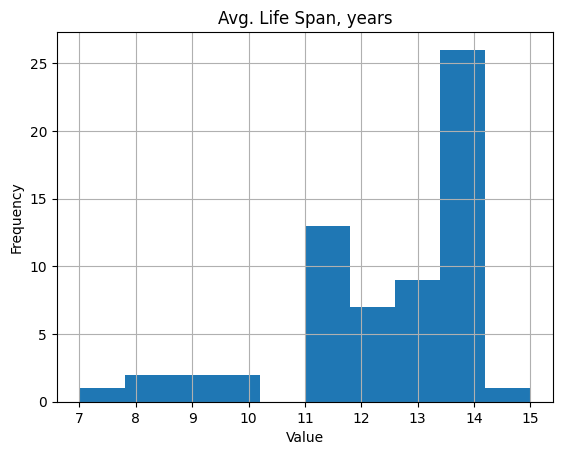

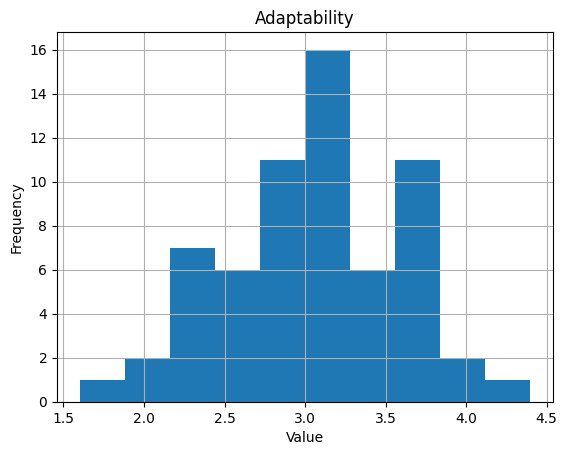

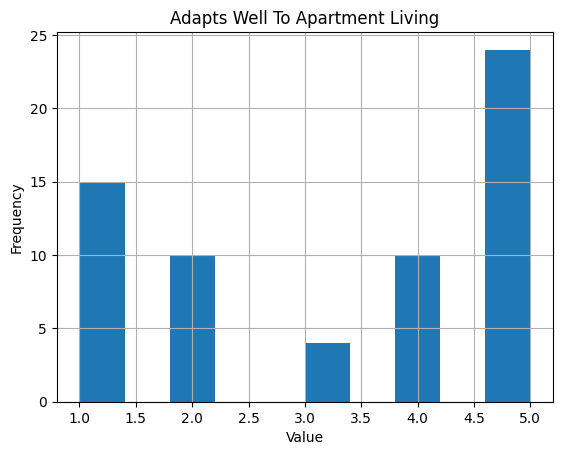

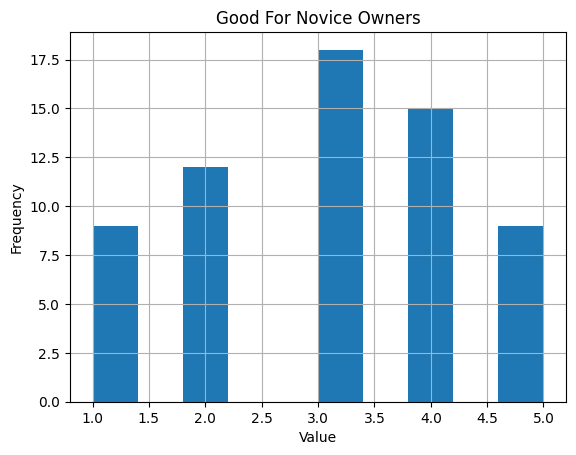

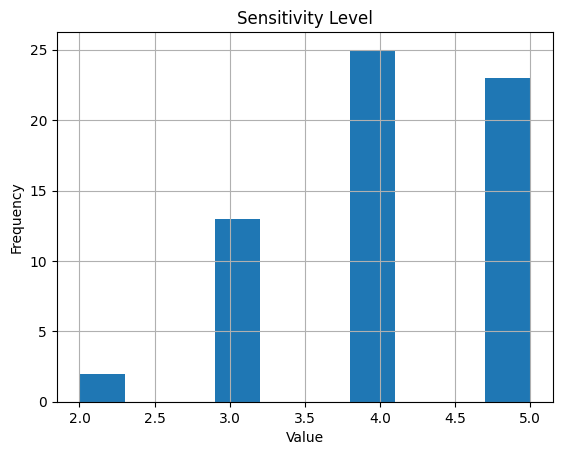

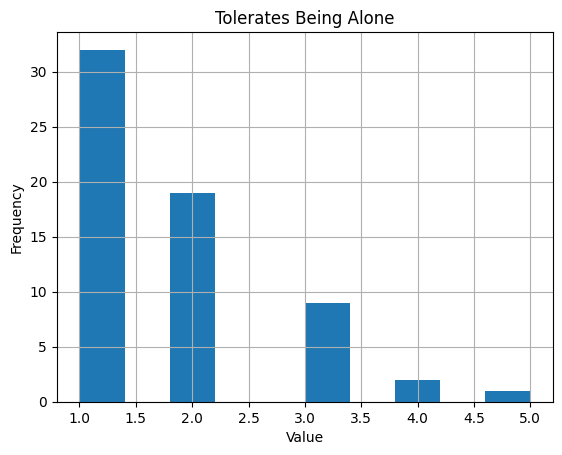

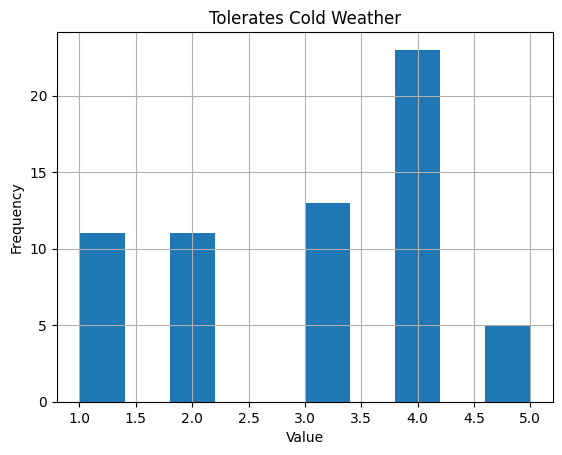

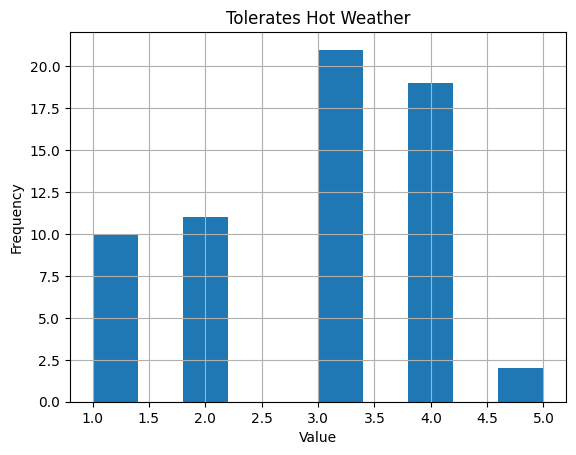

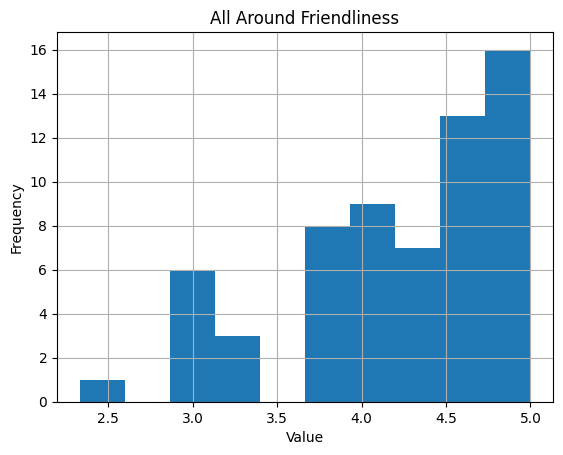

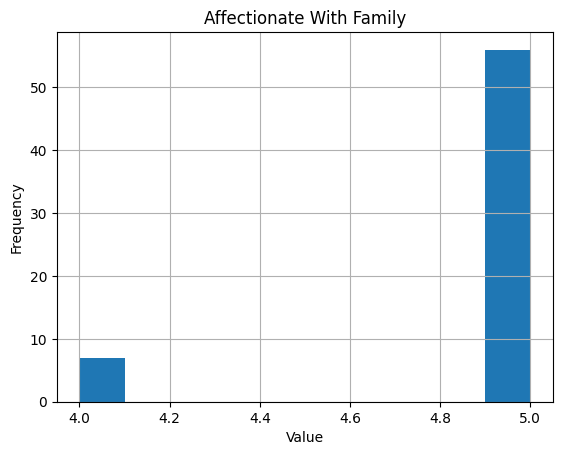

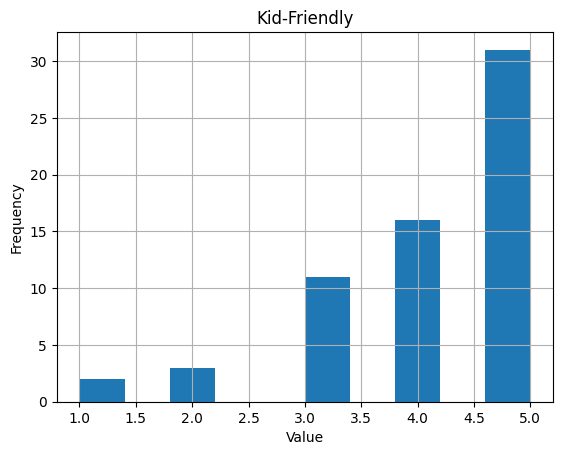

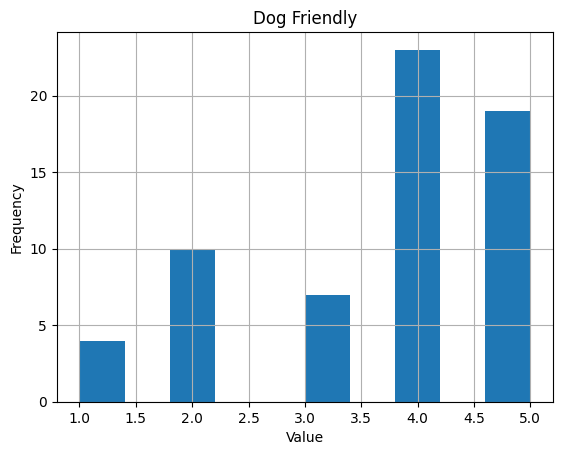

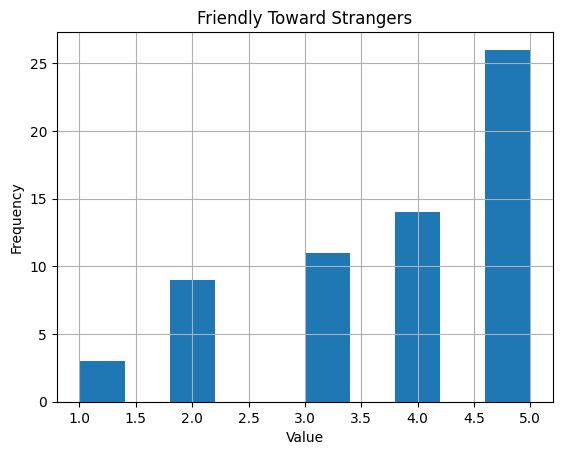

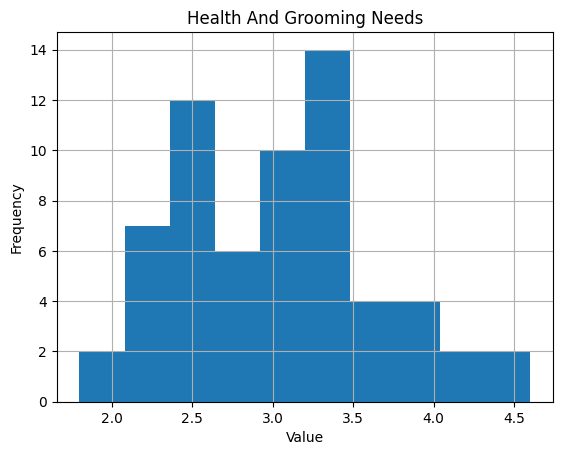

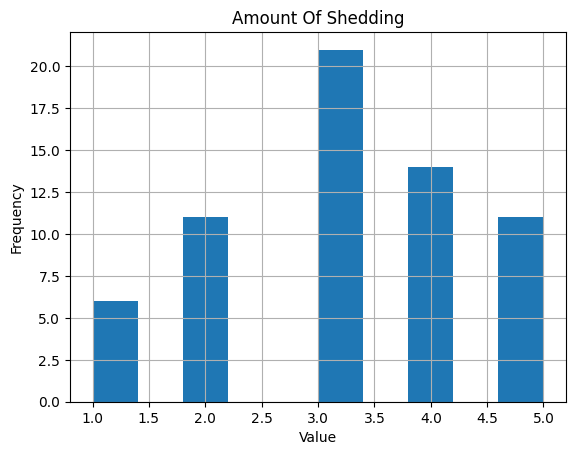

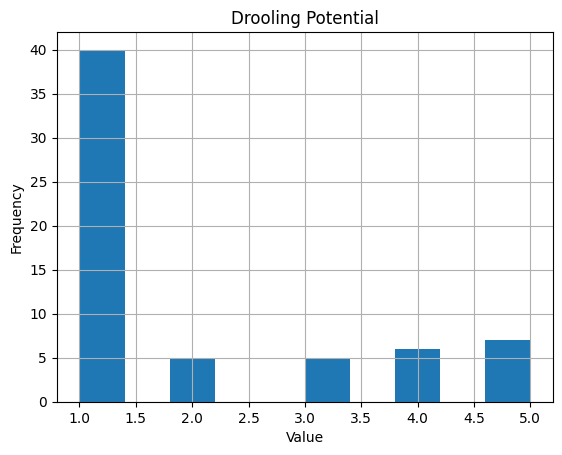

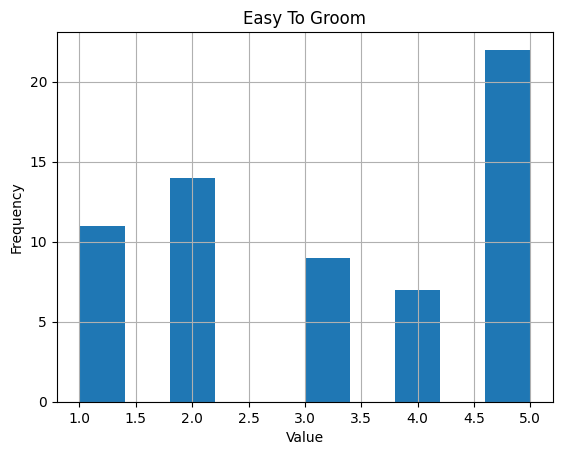

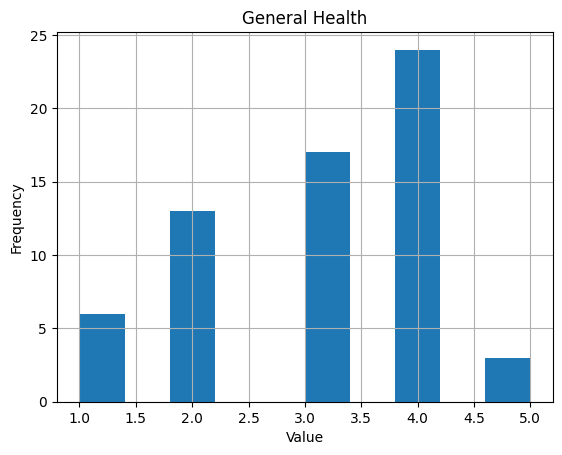

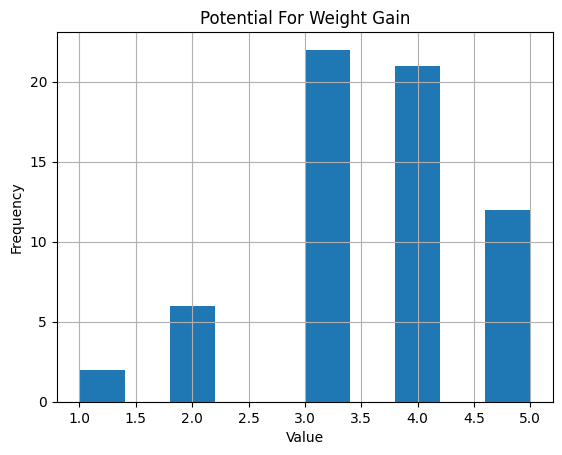

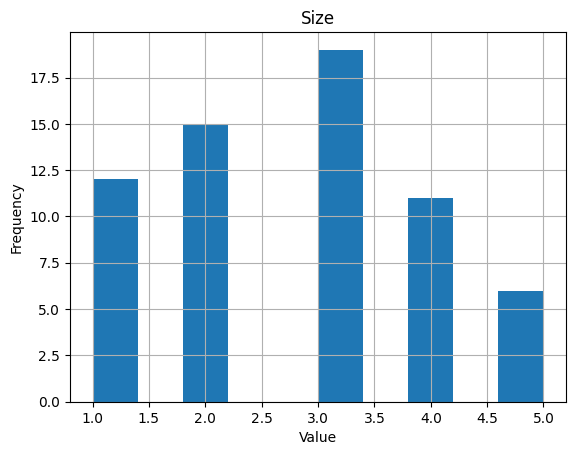

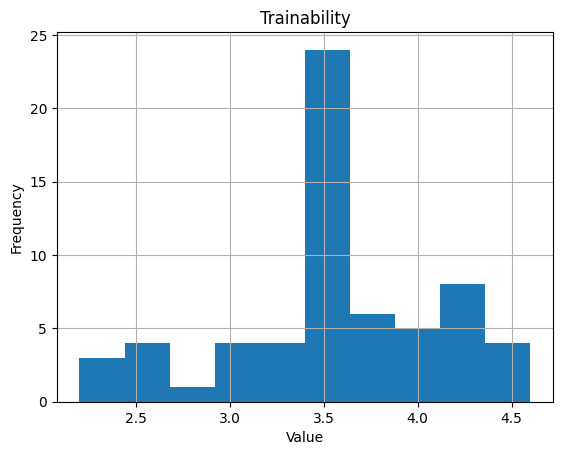

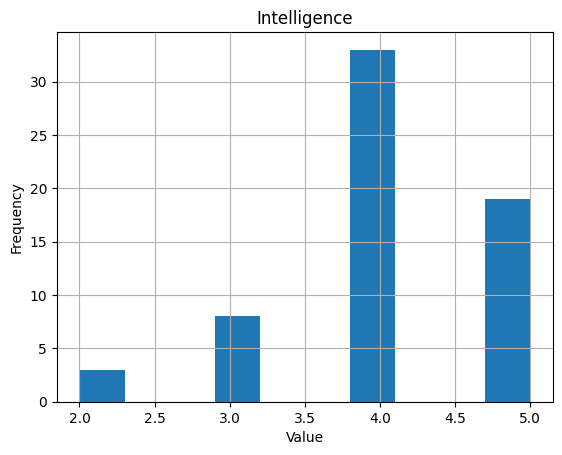

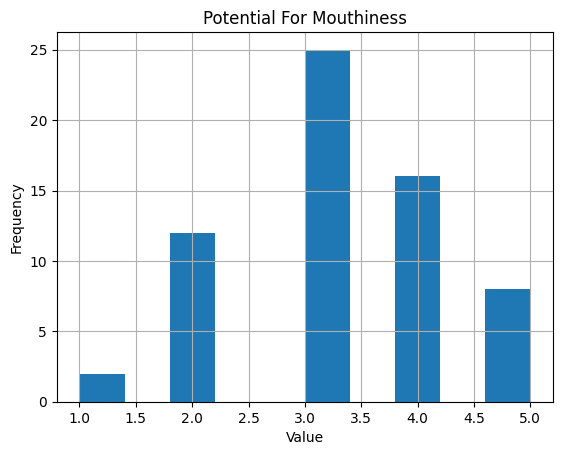

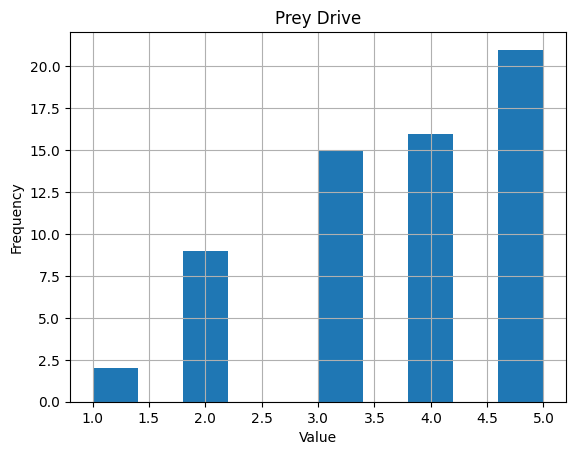

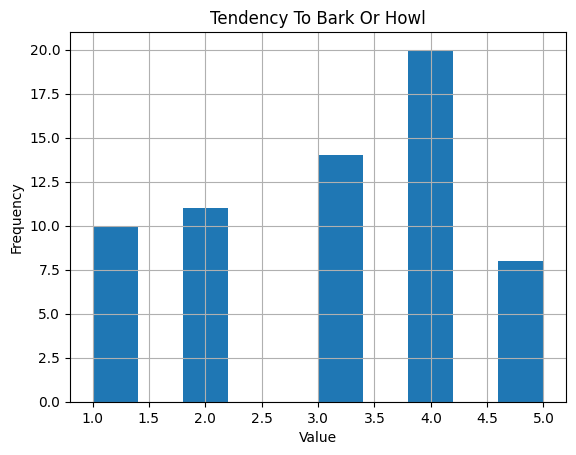

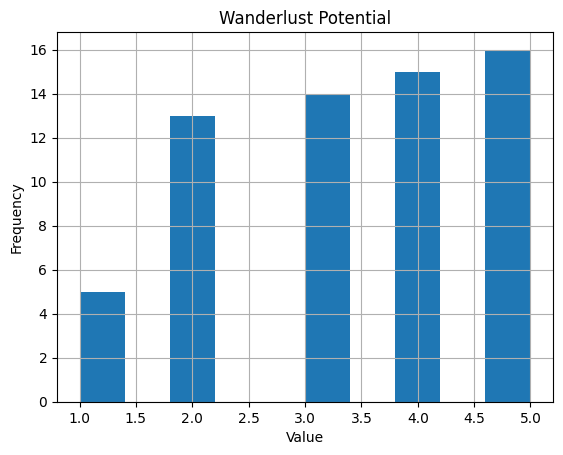

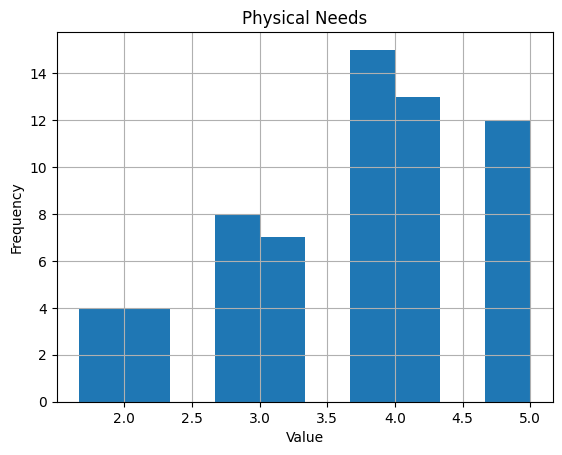

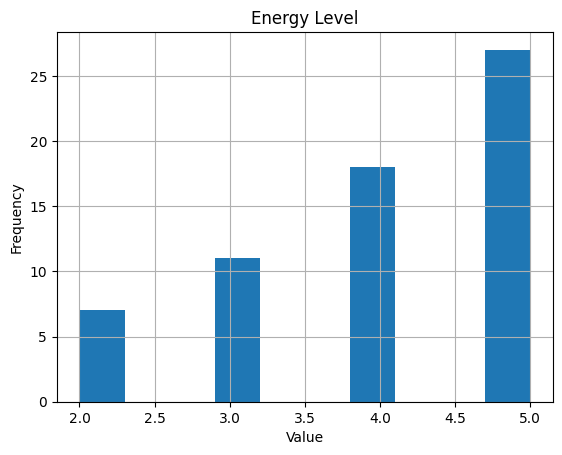

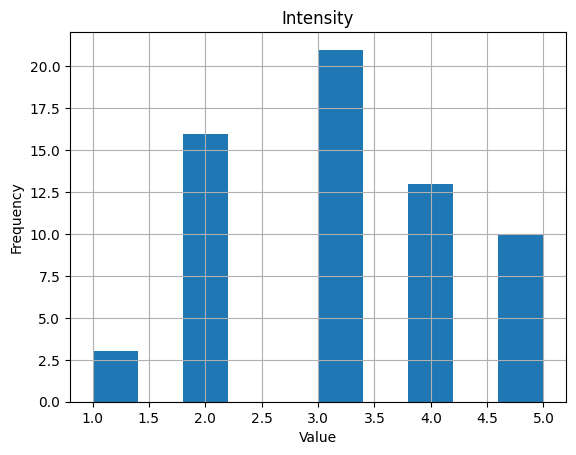

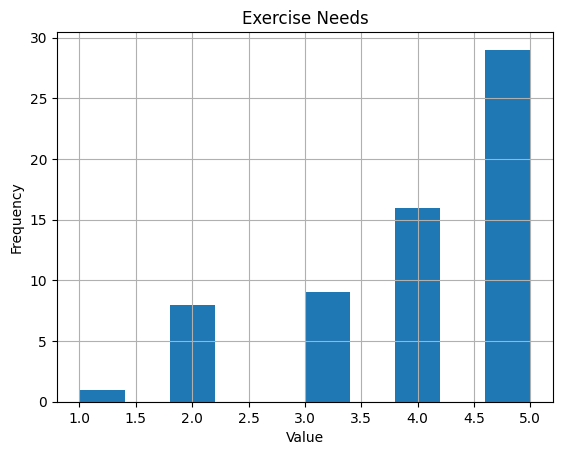

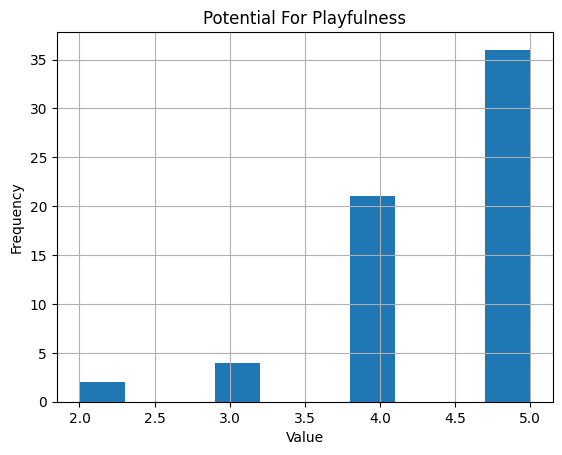

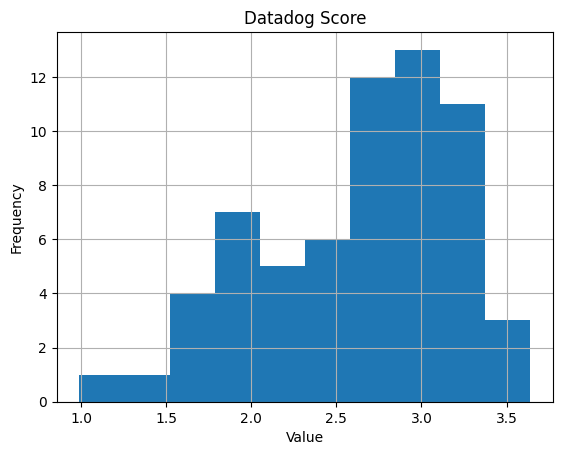

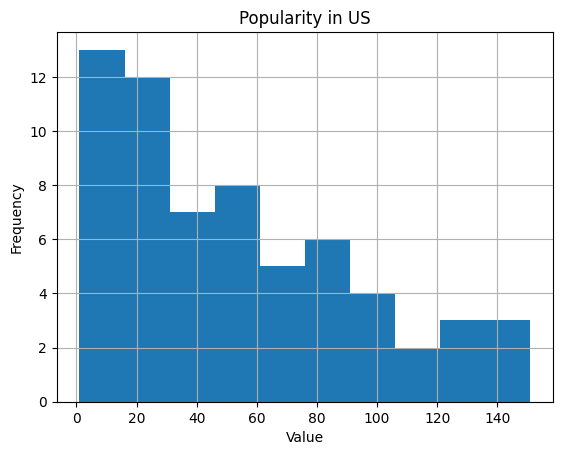

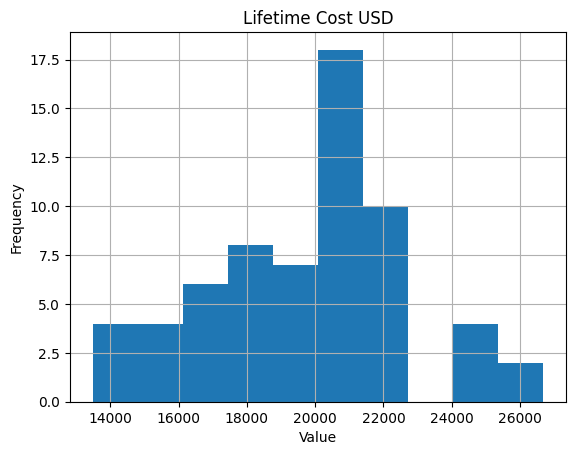

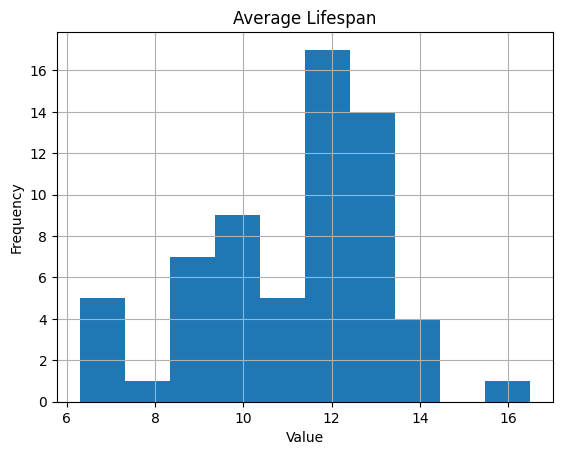

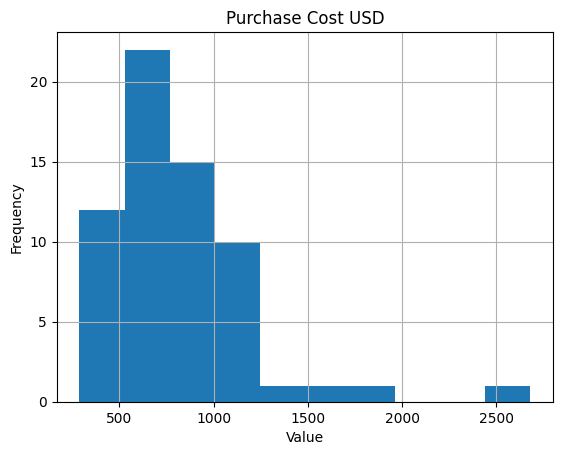

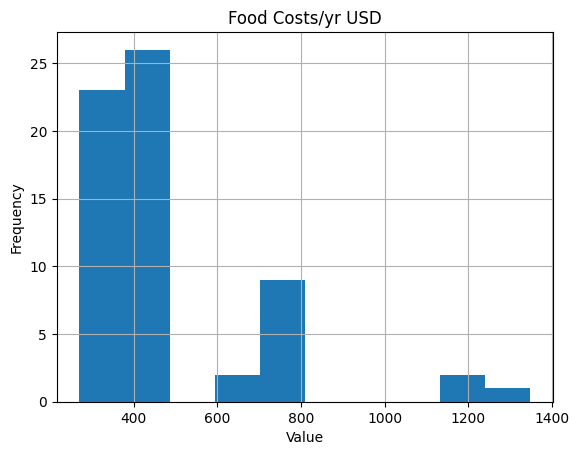

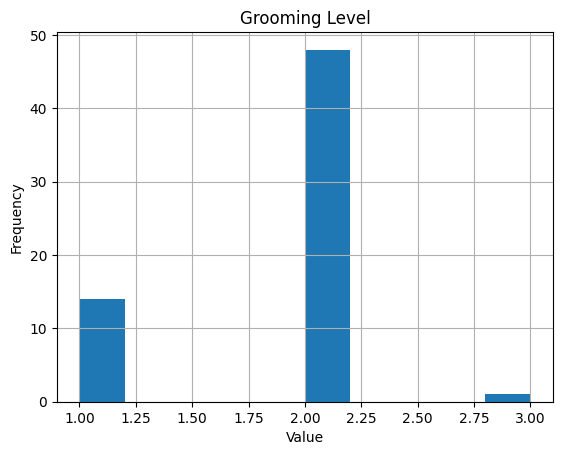

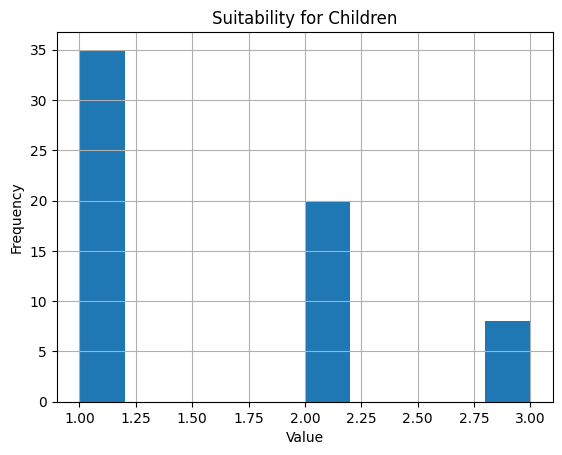

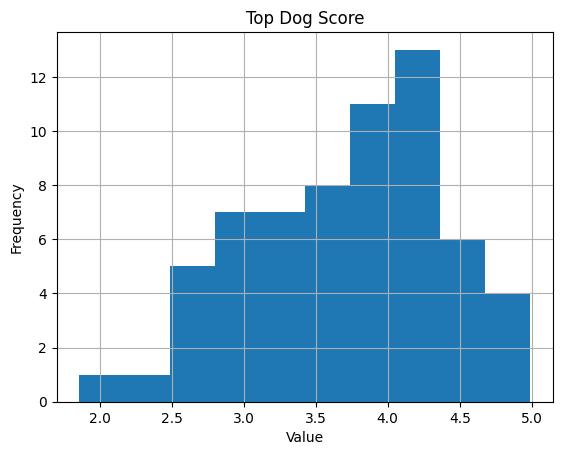

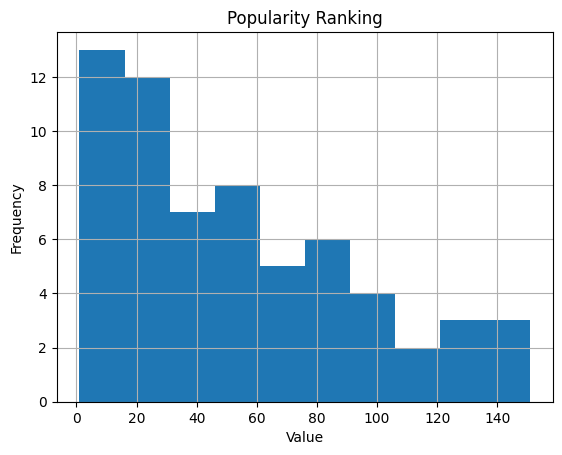

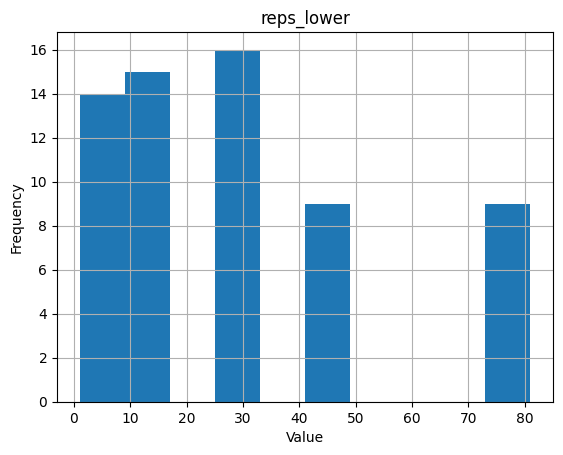

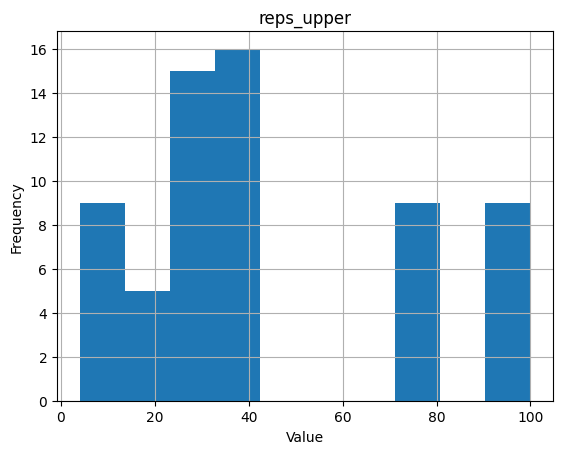

In [16]:
def quick_hist(df):
    df1 = df.copy()

    for col in df.columns:
        # Numeric and range is not  [0,1]
        if df1[col].dtype != "object" and not all( 0 <= x <=1 for x in df1[col]):
            plt.figure()
            df1[col].hist()
            plt.title(col)
            plt.xlabel('Value')
            plt.ylabel('Frequency')
            plt.show()

quick_hist(df2)

Recall the variables we want our models to be able to predict: Lifetime Cost USD, Datadog, Trainability, Top Dog Score, and Good For Novice Owners. Most of these are arbitrary scores from 1-5, however, lifetime cost can very greatly. Let's take a look

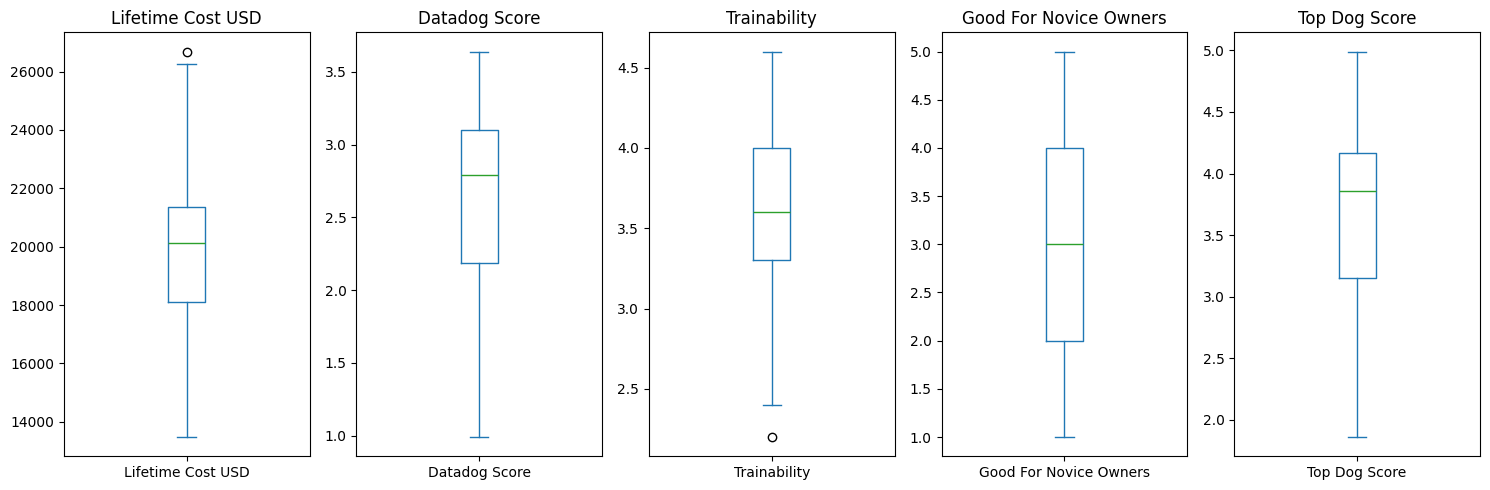

Lifetime Cost USD  Datadog Score  Trainability  Good For Novice Owners  \
count          63.000000      63.000000     63.000000               63.000000   
mean        19769.539683       2.634921      3.558730                3.047619   
std          2940.152530       0.598915      0.553183                1.262723   
min         13479.000000       0.990000      2.200000                1.000000   
25%         18110.000000       2.185000      3.300000                2.000000   
50%         20143.000000       2.790000      3.600000                3.000000   
75%         21373.000000       3.100000      4.000000                4.000000   
max         26686.000000       3.640000      4.600000                5.000000   

       Top Dog Score  
count      63.000000  
mean        3.698889  
std         0.686577  
min         1.860000  
25%         3.155000  
50%         3.860000  
75%         4.165000  
max         4.990000

In [17]:
desired = ['Lifetime Cost USD', 'Datadog Score','Trainability', 'Good For Novice Owners',"Top Dog Score"]

def box_plots(df, columns):

    df1 = df.copy()

    # Actually plot
    fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(15, 5))
    
    for i, (col, ax) in enumerate(zip(columns, axes)):
        df1[col].plot(kind='box', ax=ax)
        axes[i].set_title(col)

    plt.tight_layout()
    plt.show()

    # Describe plotted variables
    df1 = df1.filter(columns, axis = 1)

    return df1.describe()
    
box_plots(df2,desired)

Not much in the way of outliers! But let's just remove them anyway, based off z-score for these columns! We will denote Outliers as being 3-zscores away from the mean

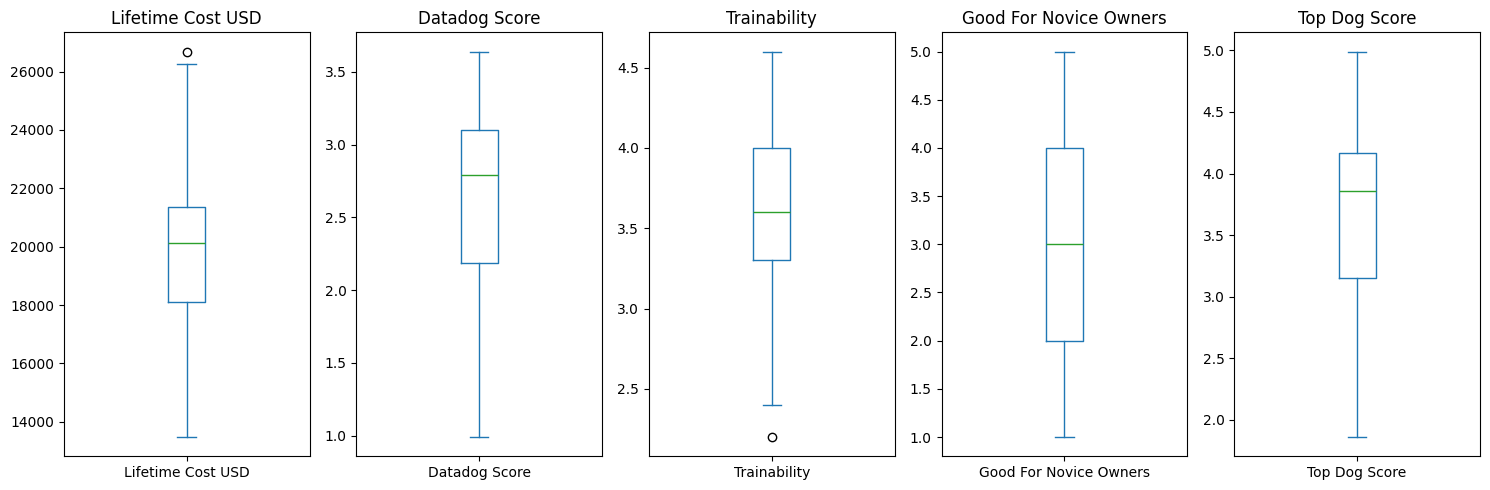

Lifetime Cost USD  Datadog Score  Trainability  Good For Novice Owners  \
count          63.000000      63.000000     63.000000               63.000000   
mean        19769.539683       2.634921      3.558730                3.047619   
std          2940.152530       0.598915      0.553183                1.262723   
min         13479.000000       0.990000      2.200000                1.000000   
25%         18110.000000       2.185000      3.300000                2.000000   
50%         20143.000000       2.790000      3.600000                3.000000   
75%         21373.000000       3.100000      4.000000                4.000000   
max         26686.000000       3.640000      4.600000                5.000000   

       Top Dog Score  
count      63.000000  
mean        3.698889  
std         0.686577  
min         1.860000  
25%         3.155000  
50%         3.860000  
75%         4.165000  
max         4.990000

In [18]:
def remove_outliers(df,columns, t =3):
    df1 = df.copy()

    z_score = df1[columns].apply(zscore)
    z_score = np.abs(z_score)

    df_cleaned = df1[(z_score < t).all(axis=1)]

    return df_cleaned

df_clean = remove_outliers(df2,desired)
box_plots(df_clean,desired)

Surpringly, no outliers from this convention! Everything is exactly the same! We'll just keep going with df2 then!

<Axes: >

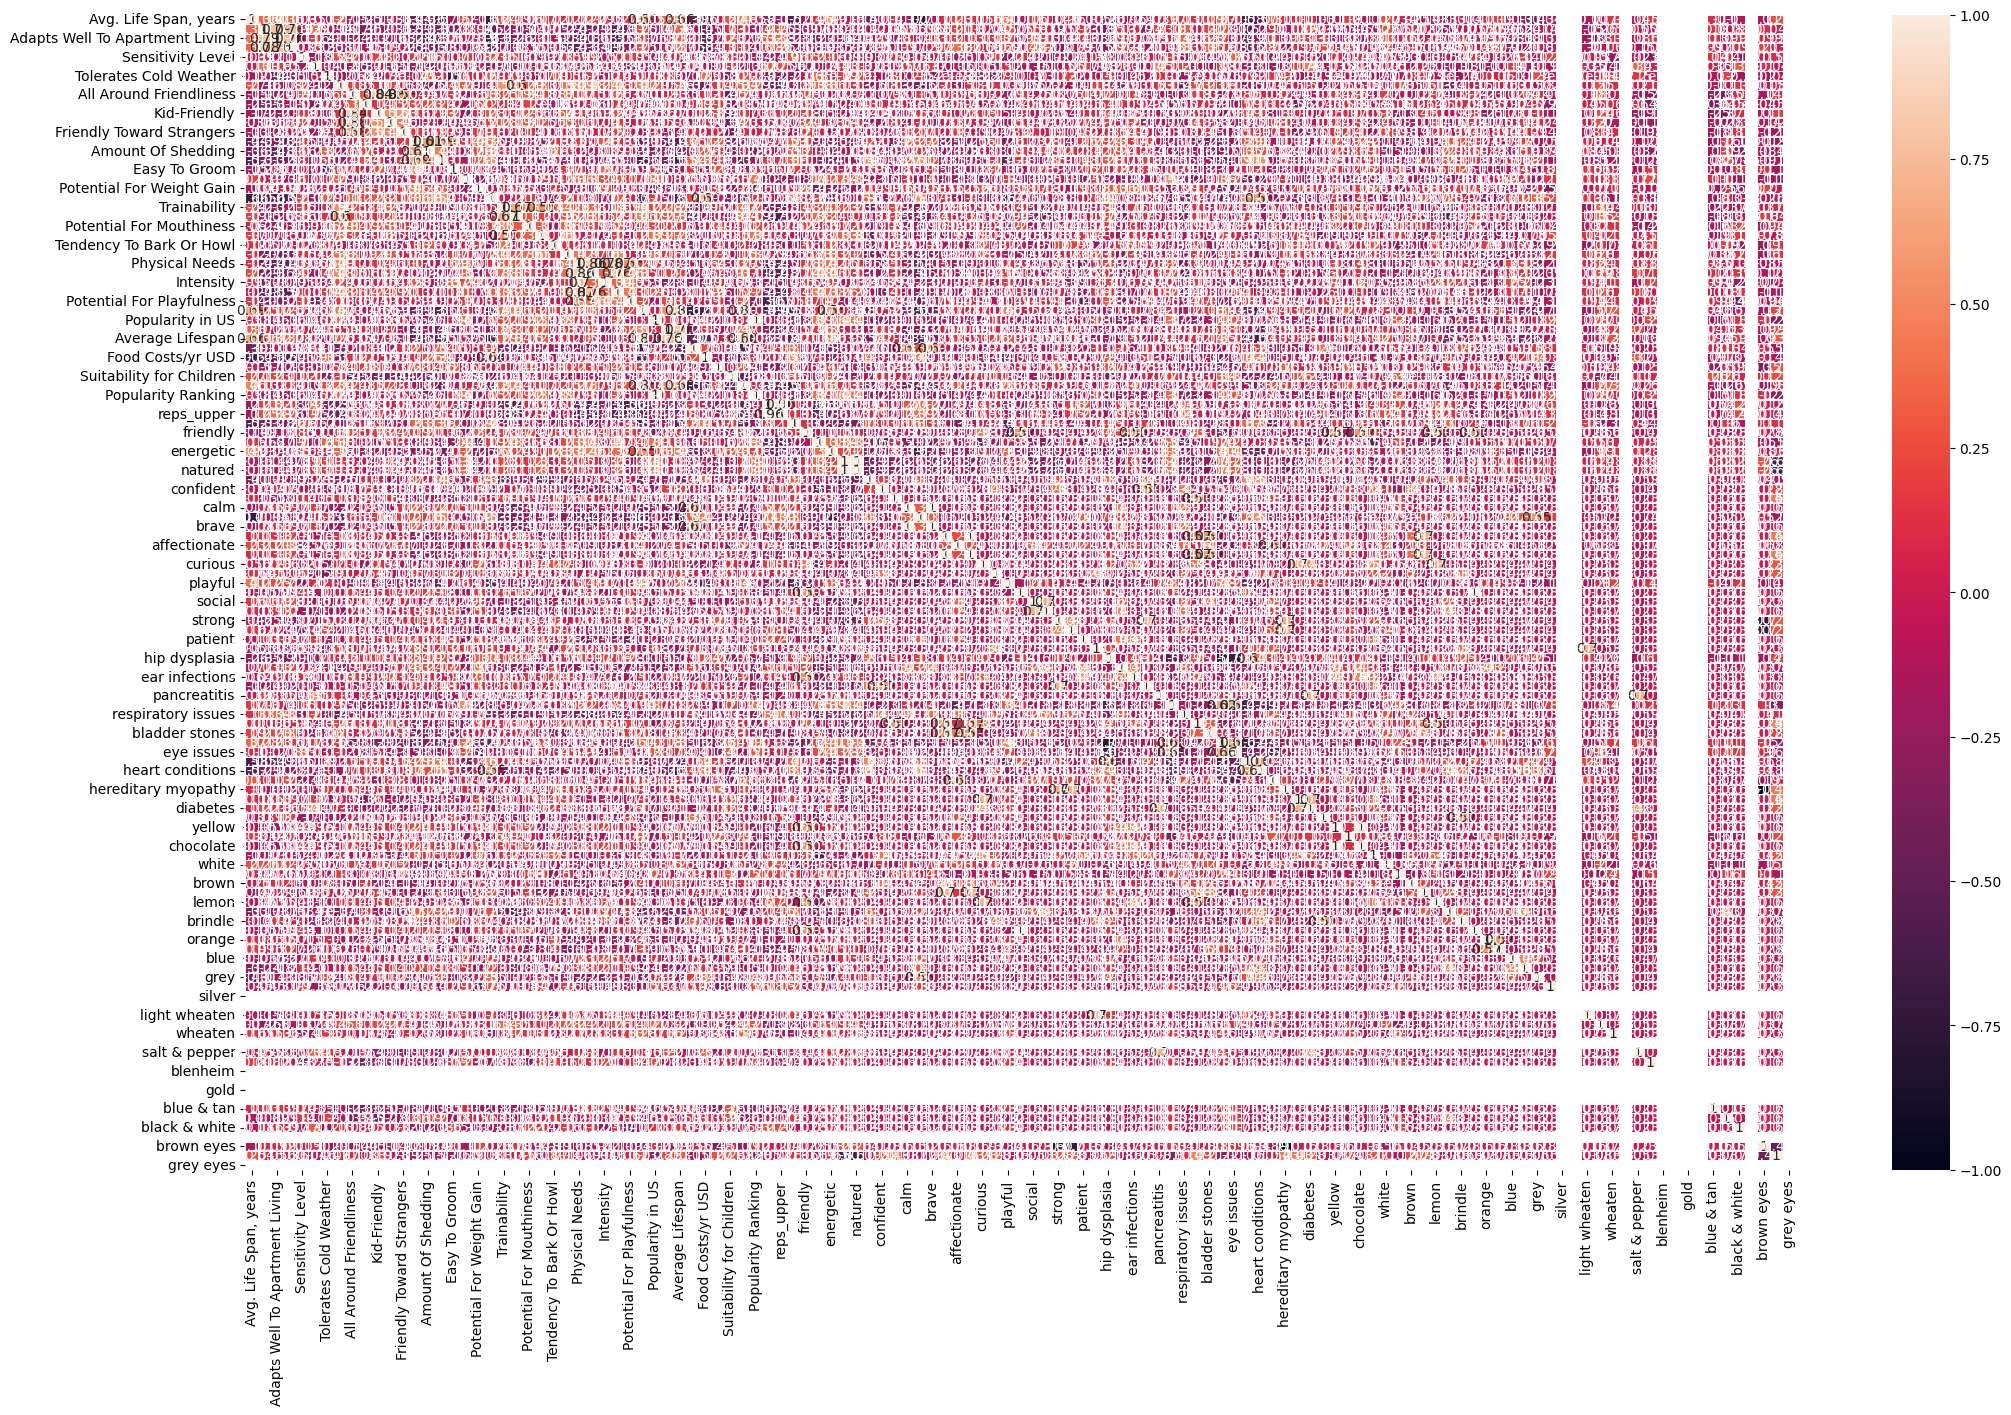

In [19]:
# Plotting Heatmap
corr_df = df2.select_dtypes(exclude=['string', 'object'])

corr_plot =  corr_df.corr()
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(corr_plot, annot=True, linewidths=.5, ax=ax)

From this, we can see that some variables are so rare that they would best be kept out of the dataset to avoid overtraining and skewing the data, since they're seen in one dog breed.

Then, as convention, we can look at what attributes have 0.8 correlation with each other or higher, and remove soome of those as neccesary

In [20]:
corr_plot = corr_plot.dropna(axis=1, how = 'all')
corr_plot = corr_plot.dropna(axis=0, how = 'all')
corr_plot

Avg. Life Span, years  Adaptability  \
Avg. Life Span, years                         1.000000      0.360915   
Adaptability                                  0.360915      1.000000   
Adapts Well To Apartment Living               0.405539      0.794003   
Good For Novice Owners                        0.355430      0.775075   
Sensitivity Level                             0.003528      0.091532   
...                                                ...           ...   
blue & tan                                    0.109369      0.132637   
sesame                                       -0.101557     -0.008197   
black & white                                -0.101557      0.085693   
brown eyes                                   -0.109369      0.102086   
blue eyes                                     0.252850      0.046169   

                                 Adapts Well To Apartment Living  \
Avg. Life Span, years                                   0.405539   
Adaptability                                            0.794003   
Adapts Well To Apartment Living                         1.000000   
Good For Novice Owners                                  0.762853   
Sensitivity Level                                      -0.112773   
...                                                          ...   
blue & tan                                              0.132203   
sesame                                                 -0.099152   
black & white                                           0.132203   
brown eyes                                              0.099152   
blue eyes                                               0.056034   

                                 Good For Novice Owners  Sensitivity Level  \
Avg. Life Span, years                          0.355430           0.003528   
Adaptability                                   0.775075           0.091532   
Adapts Well To Apartment Living                0.762853          -0.112773   
Good For Novice Owners                         1.000000          -0.034884   
Sensitivity Level                             -0.034884           1.000000   
...                                                 ...                ...   
blue & tan                                     0.096556           0.138395   
sesame                                        -0.106212           0.138395   
black & white                                  0.096556          -0.167531   
brown eyes                                     0.207596           0.014568   
blue eyes                                      0.035716           0.107774   

                                 Tolerates Being Alone  \
Avg. Life Span, years                         0.010552   
Adaptability                                  0.391845   
Adapts Well To Apartment Living               0.162207   
Good For Novice Owners                        0.051518   
Sensitivity Level                            -0.175134   
...                                                ...   
blue & tan                                    0.034859   
sesame                                       -0.102398   
black & white                                 0.309372   
brown eyes                                    0.102398   
blue eyes                                    -0.046339   

                                 Tolerates Cold Weather  \
Avg. Life Span, years                         -0.119776   
Adaptability                                  -0.009409   
Adapts Well To Apartment Living               -0.409587   
Good For Novice Owners                        -0.345431   
Sensitivity Level                             -0.153285   
...                                                 ...   
blue & tan                                    -0.101827   
sesame                                         0.203653   
black & white                                 -0.203653   
brown eyes                                    -0.203653   
blue eyes                                     -0.047082   

        

In [21]:
def threshold_corr(df, upper= 0.8, lower = -0.8):
    df1 = df.copy()

    df1 = df1[(df1 > upper) | (df1 < lower)]
    df1 = df1[(df1 != 1) & (df1 !=-1 )]

    df1 = df1.dropna(how='all').dropna(how='all', axis=1)

    return df1

threshold_corr(corr_plot)

All Around Friendliness  Kid-Friendly  Dog Friendly  \
All Around Friendliness                      NaN      0.839509      0.880926   
Kid-Friendly                            0.839509           NaN           NaN   
Dog Friendly                            0.880926           NaN           NaN   
Physical Needs                               NaN           NaN           NaN   
Energy Level                                 NaN           NaN           NaN   
Exercise Needs                               NaN           NaN           NaN   
Datadog Score                                NaN           NaN           NaN   
Average Lifespan                             NaN           NaN           NaN   
Top Dog Score                                NaN           NaN           NaN   
reps_lower                                   NaN           NaN           NaN   
reps_upper                                   NaN           NaN           NaN   

                         Physical Needs  Energy Level  Exercise Needs  \
All Around Friendliness             NaN           NaN             NaN   
Kid-Friendly                        NaN           NaN             NaN   
Dog Friendly                        NaN           NaN             NaN   
Physical Needs                      NaN      0.857567        0.865582   
Energy Level                   0.857567           NaN             NaN   
Exercise Needs                 0.865582           NaN             NaN   
Datadog Score                       NaN           NaN             NaN   
Average Lifespan                    NaN           NaN             NaN   
Top Dog Score                       NaN           NaN             NaN   
reps_lower                          NaN           NaN             NaN   
reps_upper                          NaN           NaN             NaN   

                         Datadog Score  Average Lifespan  Top Dog Score  \
All Around Friendliness            NaN               NaN            NaN   
Kid-Friendly                       NaN               NaN            NaN   
Dog Friendly                       NaN               NaN            NaN   
Physical Needs                     NaN               NaN            NaN   
Energy Level                       NaN               NaN            NaN   
Exercise Needs                     NaN               NaN            NaN   
Datadog Score                      NaN          0.834569       0.850664   
Average Lifespan              0.834569               NaN            NaN   
Top Dog Score                 0.850664               NaN            NaN   
reps_lower                         NaN               NaN            NaN   
reps_upper                         NaN               NaN            NaN   

                         reps_lower  reps_upper  
All Around Friendliness         NaN         NaN  
Kid-Friendly                    NaN         NaN  
Dog Friendly                    NaN         NaN  
Physical Needs                  NaN         NaN  
Energy Level                    NaN         NaN  
Exercise Needs                  NaN         NaN  
Datadog Score                   NaN         NaN  
Average Lifespan                NaN         NaN  
Top Dog Score                   NaN         NaN  
reps_lower                      NaN    0.959975  
reps_upper                 0.959975         NaN

Now we see which variables that are have high degrees of colinearity, as the values that do not have NaN with each other show where they are and by how much. Looking at the variables themselves, they seem to give the same general info, friendliness, intellgence, and energy needs, so it makes sense that they are so crrelated with each other.

We can arbitraily take out one item per grouping to remove this problem, let's keep Kid-Friendly, Physical Needs, and reps_lower, and get rid of everything else

In [22]:
keep = ['Kid-Friendly','Physical Needs','reps_lower']
excess = threshold_corr(corr_plot).drop(keep,axis = 1).columns

df3 = df2.drop(excess, axis = 1)
df3

Breed  Avg. Life Span, years  Adaptability  \
0                 Affenpinscher                   13.0           3.2   
1                         Akita                   11.0           3.0   
2         Australian Cattle Dog                   14.0           2.8   
4           Australian Shepherd                   14.0           2.8   
7            Australian Terrier                   15.0           3.0   
..                          ...                    ...           ...   
71   Staffordshire Bull Terrier                   13.0           2.6   
72       Welsh Springer Spaniel                   12.0           3.6   
73  West Highland White Terrier                   14.0           3.6   
75                      Whippet                   14.0           3.2   
76            Yorkshire Terrier                   14.0           3.6   

    Adapts Well To Apartment Living  Good For Novice Owners  \
0                                 5                       4   
1                                 2                       2   
2                                 2                       1   
4                                 1                       2   
7                                 5                       3   
..                              ...                     ...   
71                                3                       1   
72                                4                       4   
73                                4                       4   
75                                5                       3   
76                                5                       4   

    Sensitivity Level  Tolerates Being Alone  Tolerates Cold Weather  \
0                   3                      1                       3   
1                   5                      1                       5   
2                   4                      3                       4   
4                   5                      2                       4   
7                   2                      2                       3   
..                ...                    ...                     ...   
71                  4                      2                       3   
72                  5                      1                       4   
73                  4                      2                       4   
75                  5                      2                       1   
76                  5                      2                       2   

    Tolerates Hot Weather  Affectionate With Family  ...  blue merle  gold  \
0                       3                         5  ...           0     0   
1                       2                         5  ...           0     0   
2                       4                         5  ...           0     0   
4                       4                         5  ...           0     0   
7                       4                         4  ...           0     0   
..                    ...                       ...  ...         ...   ...   
71                      1                         5  ...           0     0   
72                      4                         5  ...           0     0   
73                      3                         5  ...           0     0   
75                      4                         5  ...           0     0   
76                      2                         4  ...           0     0   

    stag red  blue & tan  sesame  black & white  merle  brown eyes  blue eyes  \
0          0           0       0              0      0           1          0   
1          0           0       1              0      0           1          0   
2          0           0       0              0      0           1          0   
4          0           0       0              0      0           1          1   
7          0           0       0              0      0           1          0   
..       ...         ...     ...            ...    ...         ...        ...   
71         0           0       0   

Now let's look at only the binary variables and see if we can look at how they are distributed

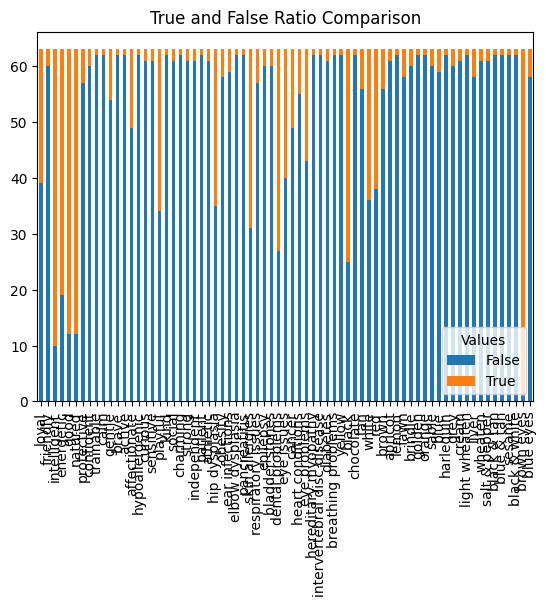

loyal   friendly  intelligent  energetic       good    natured  \
Percent 0  61.904762  95.238095    15.873016   30.15873  19.047619  19.047619   
Percent 1  38.095238   4.761905    84.126984   69.84127  80.952381  80.952381   

           protective  confident  trainable       calm  ...  light wheaten  \
Percent 0    90.47619  95.238095  98.412698  98.412698  ...      98.412698   
Percent 1     9.52381   4.761905   1.587302   1.587302  ...       1.587302   

               liver    wheaten  salt & pepper  black & tan  blue & tan  \
Percent 0  92.063492  96.825397      96.825397    98.412698   98.412698   
Percent 1   7.936508   3.174603       3.174603     1.587302    1.587302   

              sesame  black & white  brown eyes  blue eyes  
Percent 0  98.412698      98.412698    1.587302  92.063492  
Percent 1   1.587302       1.587302   98.412698   7.936508  

[2 rows x 71 columns]

In [23]:
def compare_binary(df, output = True):
    df1 = df.copy()
    
    def is_binary(df):
        binary = []

        for c in df.columns:
            if np.min(df[c]) == 0 and np.max(df[c]) == 1:
                binary.append(c)

        return binary

    bin = is_binary(df1)
    df1 = df1.filter(bin, axis = 1)

    counts = df1.apply(pd.Series.value_counts)

    if output:
        counts.T.plot(kind='bar', stacked=True)
        plt.title('True and False Ratio Comparison')
        plt.legend(title='Values', labels=['False', 'True'])
        plt.show()

    def percentages(df):
        dfp = df.copy()
        percents = counts.div(dfp.shape[0]) * 100

        percents.index = ['Percent 0', 'Percent 1']

        return percents
    
    return percentages(df1)
percent_bin = compare_binary(df3) 
percent_bin

Obviously this is a lot of columns, but we see that some are way more one thing than another! Let's chose an arbitrary threshold of 85% to remove columns that are too much of one thing to avoid overtraining and overfitting

In [24]:
def filter_binary_p(df, t = 85):
    df1 = df.copy()
    
    excess = df1[df1 >t].dropna(axis =1, how = 'all').columns
    df1 = df1.drop(excess, axis =1)

    return df1

percent_bin = filter_binary_p(percent_bin)
print(percent_bin.shape)
percent_bin

(2, 16)


loyal  intelligent  energetic       good    natured  \
Percent 0  61.904762    15.873016   30.15873  19.047619  19.047619   
Percent 1  38.095238    84.126984   69.84127  80.952381  80.952381   

           affectionate    playful  hip dysplasia  skin allergies  \
Percent 0     77.777778  53.968254      55.555556       49.206349   
Percent 1     22.222222  46.031746      44.444444       50.793651   

           dental problems  eye issues     cancer  eye problems     black  \
Percent 0        42.857143   63.492063  77.777778     68.253968  39.68254   
Percent 1        57.142857   36.507937  22.222222     31.746032  60.31746   

               white       red  
Percent 0  57.142857  60.31746  
Percent 1  42.857143  39.68254

Much smaller! So we can get rid of those other variables too. 

In [25]:
def filter_binary_df(df,df_p, t = 85):
    df1 = df.copy()

    def is_binary(df):
        binary = []

        for c in df.columns:
            if np.min(df[c]) == 0 and np.max(df[c]) == 1:
                binary.append(c)

        return binary

    bin = is_binary(df1)
    keep_bin = df_p.columns

    # Remove keep_bin columns from bin
    bin = [c for c in bin if c not in keep_bin]
    df1 = df1.drop(bin, axis = 1)

    return df1
    
    
df4 = filter_binary_df(df3, percent_bin)
df4

Breed  Avg. Life Span, years  Adaptability  \
0                 Affenpinscher                   13.0           3.2   
1                         Akita                   11.0           3.0   
2         Australian Cattle Dog                   14.0           2.8   
4           Australian Shepherd                   14.0           2.8   
7            Australian Terrier                   15.0           3.0   
..                          ...                    ...           ...   
71   Staffordshire Bull Terrier                   13.0           2.6   
72       Welsh Springer Spaniel                   12.0           3.6   
73  West Highland White Terrier                   14.0           3.6   
75                      Whippet                   14.0           3.2   
76            Yorkshire Terrier                   14.0           3.6   

    Adapts Well To Apartment Living  Good For Novice Owners  \
0                                 5                       4   
1                                 2                       2   
2                                 2                       1   
4                                 1                       2   
7                                 5                       3   
..                              ...                     ...   
71                                3                       1   
72                                4                       4   
73                                4                       4   
75                                5                       3   
76                                5                       4   

    Sensitivity Level  Tolerates Being Alone  Tolerates Cold Weather  \
0                   3                      1                       3   
1                   5                      1                       5   
2                   4                      3                       4   
4                   5                      2                       4   
7                   2                      2                       3   
..                ...                    ...                     ...   
71                  4                      2                       3   
72                  5                      1                       4   
73                  4                      2                       4   
75                  5                      2                       1   
76                  5                      2                       2   

    Tolerates Hot Weather  Affectionate With Family  ...  red  silver  \
0                       3                         5  ...    1       0   
1                       2                         5  ...    1       0   
2                       4                         5  ...    1       0   
4                       4                         5  ...    1       0   
7                       4                         4  ...    1       0   
..                    ...                       ...  ...  ...     ...   
71                      1                         5  ...    1       0   
72                      4                         5  ...    0       0   
73                      3                         5  ...    0       0   
75                      4                         5  ...    1       0   
76                      2                         4  ...    0       0   

    mahogany  pink  blenheim  blue merle  gold  stag red  merle  grey eyes  
0          0     0         0           0     0         0      0          0  
1          0     0         0           0     0         0      0          0  
2          0     0         0           0     0         0      0          0  
4          0     0         0           0     0         0      0          0  
7          0     0         0           0     0         0      0          0  
..       ...   ...       ...         ...   ...       ...    ...        ...  
71         0     0         0           0     0         0      0          0  
72         0     0         0           0     0

Much less variables now! Let's look again at the binary graph

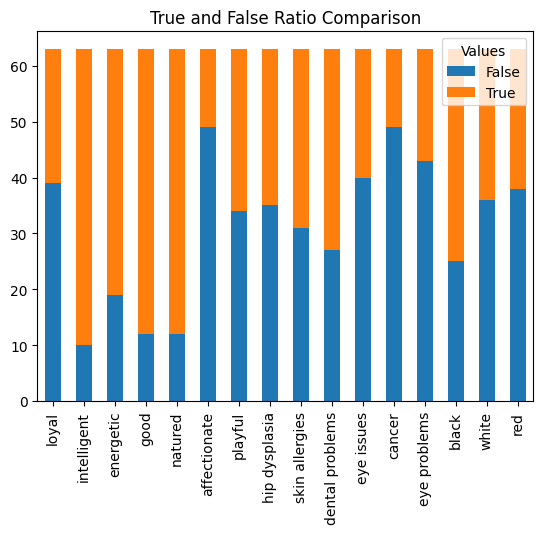

loyal  intelligent  energetic       good    natured  \
Percent 0  61.904762    15.873016   30.15873  19.047619  19.047619   
Percent 1  38.095238    84.126984   69.84127  80.952381  80.952381   

           affectionate    playful  hip dysplasia  skin allergies  \
Percent 0     77.777778  53.968254      55.555556       49.206349   
Percent 1     22.222222  46.031746      44.444444       50.793651   

           dental problems  eye issues     cancer  eye problems     black  \
Percent 0        42.857143   63.492063  77.777778     68.253968  39.68254   
Percent 1        57.142857   36.507937  22.222222     31.746032  60.31746   

               white       red  
Percent 0  57.142857  60.31746  
Percent 1  42.857143  39.68254

In [26]:
compare_binary(df4) 

Looks like we're good to go! Now let's make this a csv and move on to the next stage

In [27]:
df4.to_csv('cleaned_dog_data.csv', index=False)